# The Spark Foundation - GRIP (Data Science and Business Analytics - JUN'22)

# Author - AMAN KUMAR SINGH

Task #5 Perform Exploratory Data Analysis on 'Indian Premiere League'

Importing The Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Reading The Dataset

In [2]:
matches_df = pd.read_csv("matches.csv")
deliveries_df = pd.read_csv("deliveries.csv")

In [3]:
matches_df.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
matches_df.shape

(756, 18)

There are 756 rows and 18 columns

In [5]:
matches_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [6]:
matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [7]:
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [8]:
deliveries_df.shape

(179078, 21)

There are 179078 rows and 21 columns

In [9]:
deliveries_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [10]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

Summary statistics

In [11]:
deliveries_df.describe(include='all')

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
count,179078.000000,179078.000000,179078,179078,179078.000000,179078.000000,179078,179078,179078,179078.000000,...,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,8834,8834,6448
unique,NaN,NaN,15,15,NaN,NaN,516,511,405,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,487,9,499
top,NaN,NaN,Mumbai Indians,Mumbai Indians,NaN,NaN,V Kohli,SK Raina,Harbhajan Singh,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SK Raina,caught,MS Dhoni
freq,NaN,NaN,22619,22517,NaN,NaN,4211,4173,3451,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,162,5348,159
mean,1802.252957,1.482952,NaN,NaN,10.162488,3.615587,NaN,NaN,NaN,0.000452,...,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,NaN,NaN,NaN
std,3472.322805,0.502074,NaN,NaN,5.677684,1.806966,NaN,NaN,NaN,0.021263,...,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,190.000000,1.000000,NaN,NaN,5.000000,2.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,379.000000,1.000000,NaN,NaN,10.000000,4.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,567.000000,2.000000,NaN,NaN,15.000000,5.000000,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


In [12]:
matches_df.describe(include='all')

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,NaN,Mumbai,2011-04-17,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,C Shamshuddin,Nitin Menon
freq,NaN,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


Checking for the missing values if any

In [13]:
matches_df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [14]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [15]:
print("City in which most matches have been won: ",matches_df['city'].mode()) 

City in which most matches have been won:  0    Mumbai
Name: city, dtype: object


In [16]:
print("Team that has won most matches: ",matches_df['winner'].mode())

Team that has won most matches:  0    Mumbai Indians
Name: winner, dtype: object


In [17]:
print("Player who has been man of the match most times: ",matches_df['player_of_match'].mode()) 

Player who has been man of the match most times:  0    CH Gayle
Name: player_of_match, dtype: object


In [18]:
print("Most frequent Umpire 1: " ,matches_df['umpire1'].mode())

Most frequent Umpire 1:  0    HDPK Dharmasena
Name: umpire1, dtype: object


In [19]:
print("Most frequent Umpire 2: " ,matches_df['umpire2'].mode())

Most frequent Umpire 2:  0    C Shamshuddin
1           S Ravi
Name: umpire2, dtype: object


We are going to replace the missing values with the above outputs for their respective columns. Since most values are null in umpire 3 we will drop that column.

In [20]:
matches_df['city'].fillna(value='Mumbai', inplace=True)
matches_df['winner'].fillna(value='Mumbai Indians', inplace=True)
matches_df['player_of_match'].fillna(value=' CH Gayle', inplace=True)
matches_df['umpire1'].fillna(value=' HDPK Dharmasena', inplace=True)
matches_df['umpire2'].fillna(value='C Shamshuddin', inplace=True)

In [21]:
matches_df=matches_df.drop(["umpire3"],axis=1)

In [22]:
matches_df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [23]:
print(deliveries_df['player_dismissed'].mode())
print(deliveries_df['dismissal_kind'].mode())
print(deliveries_df['fielder'].mode())

0    SK Raina
Name: player_dismissed, dtype: object
0    caught
Name: dismissal_kind, dtype: object
0    MS Dhoni
Name: fielder, dtype: object


In [24]:
deliveries_df['player_dismissed'].fillna(value='SK Raina', inplace=True)
deliveries_df['dismissal_kind'].fillna(value='caught', inplace=True)
deliveries_df['fielder'].fillna(value='MS Dhoni', inplace=True)

In [25]:
deliveries_df.isnull().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batsman             0
non_striker         0
bowler              0
is_super_over       0
wide_runs           0
bye_runs            0
legbye_runs         0
noball_runs         0
penalty_runs        0
batsman_runs        0
extra_runs          0
total_runs          0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [26]:
matches_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

Here  Rising Pune Supergiants is  appearing twice and we need to fix this

In [27]:
matches_df['team1']=np.where(matches_df["team1"]=="Rising Pune Supergiants","Rising Pune Supergiant",matches_df["team1"])

In [28]:
matches_df["team2"].unique()

array(['Royal Challengers Bangalore', 'Rising Pune Supergiant',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [29]:
matches_df['team2']=np.where(matches_df["team2"]=="Rising Pune Supergiants","Rising Pune Supergiant",matches_df["team2"])

In [30]:
deliveries_df['batting_team'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [31]:
deliveries_df['batting_team']=np.where(deliveries_df["batting_team"]=="Rising Pune Supergiants","Rising Pune Supergiant",deliveries_df["batting_team"])

In [32]:
deliveries_df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)

In [33]:
deliveries_df['bowling_team']=np.where(deliveries_df["bowling_team"]=="Rising Pune Supergiants","Rising Pune Supergiant",deliveries_df["bowling_team"])

Printing all the cities which hosts IPL matches

In [34]:
matches_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Mohali', 'Bengaluru'], dtype=object)

In [35]:
matches_df['city']=np.where(matches_df["city"]=="Bengaluru","Bangalore",matches_df["city"])

In [36]:
print('Total number of MATCHES PLAYED :',deliveries_df['match_id'].nunique())
print('Total number of RUNS SCORED by the batsman :',deliveries_df.total_runs.sum())
print('Total number of WIDE RUNS :',deliveries_df.wide_runs.sum())
print('Total number of NO-BALL RUNS :',deliveries_df.noball_runs.sum())
print('Total number of BYE RUNS :',deliveries_df.bye_runs.sum())
print('Total number of LEG-BYE RUNS :',deliveries_df.legbye_runs.sum())
print('Total number of PENALTY RUNS :',deliveries_df.penalty_runs.sum())
print('Total number of BATSMAN RUNS :',deliveries_df.batsman_runs.sum())
print('Total number of SUPER OVERS :',deliveries_df[deliveries_df.is_super_over==1].match_id.nunique())

Total number of MATCHES PLAYED : 756
Total number of RUNS SCORED by the batsman : 235290
Total number of WIDE RUNS : 6576
Total number of NO-BALL RUNS : 749
Total number of BYE RUNS : 884
Total number of LEG-BYE RUNS : 3785
Total number of PENALTY RUNS : 10
Total number of BATSMAN RUNS : 223286
Total number of SUPER OVERS : 7


Exploratory Data  Analysis

Number Of Matches Played In Each Season

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

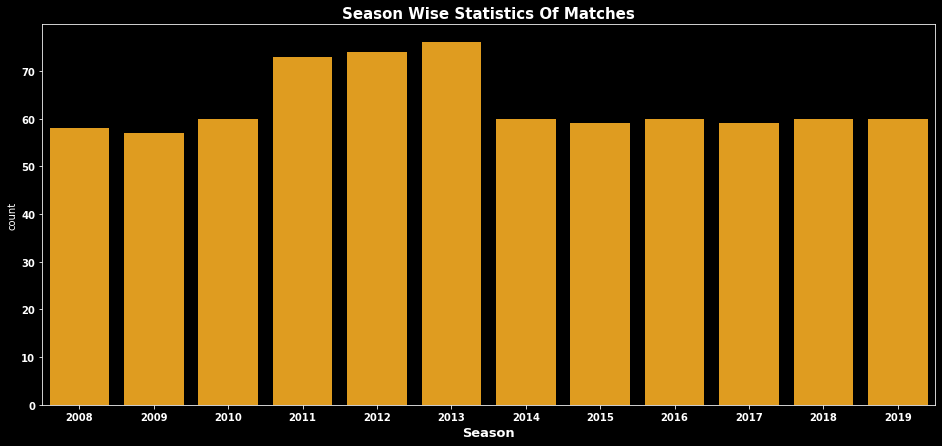

In [37]:
plt.style.use('dark_background')
plt.subplots(figsize=(16,7))
sns.countplot(matches_df['season'],color='orange')
plt.xlabel("Season",fontdict={'color':"white","fontsize":13,'fontweight':'bold'})
plt.title("Season Wise Statistics Of Matches",fontdict={'color':"white","fontsize":15,'fontweight':'bold'})
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

How many teams played in each season?

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

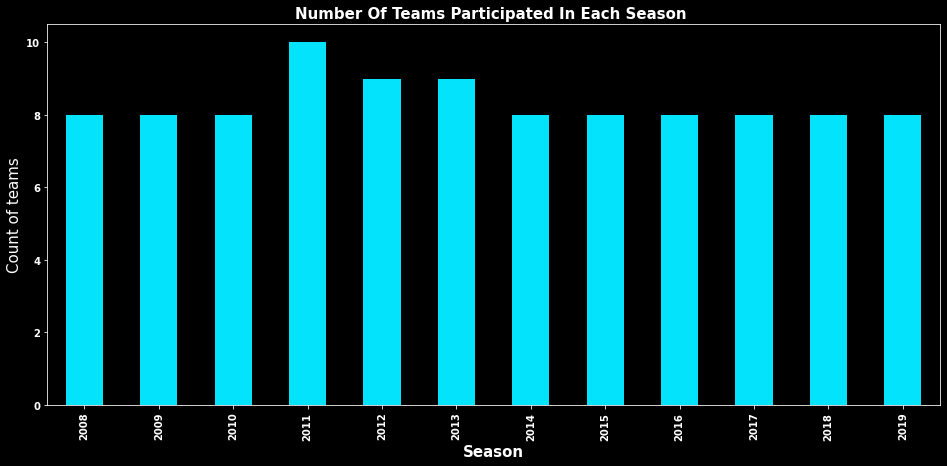

In [38]:
plt.style.use('dark_background')
matches_df.groupby('season')['team1'].nunique().plot.bar( figsize=(16,7), color = '#03e3fc')
plt.title("Number Of Teams Participated In Each Season ",fontsize=15,fontweight="bold")
plt.ylabel("Count of teams", size = 15)
plt.xlabel("Season", size = 15,fontweight="bold")
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

Venue which has hosted most number of IPL matches

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(0, 1, 'Sawai Mansingh Stadium'),
  Text(0, 2, 'MA Chidambaram Stadium, Chepauk'),
  Text(0, 3, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(0, 4, 'Feroz Shah Kotla'),
  Text(0, 5, 'Wankhede Stadium'),
  Text(0, 6, 'M Chinnaswamy Stadium'),
  Text(0, 7, 'Eden Gardens')])

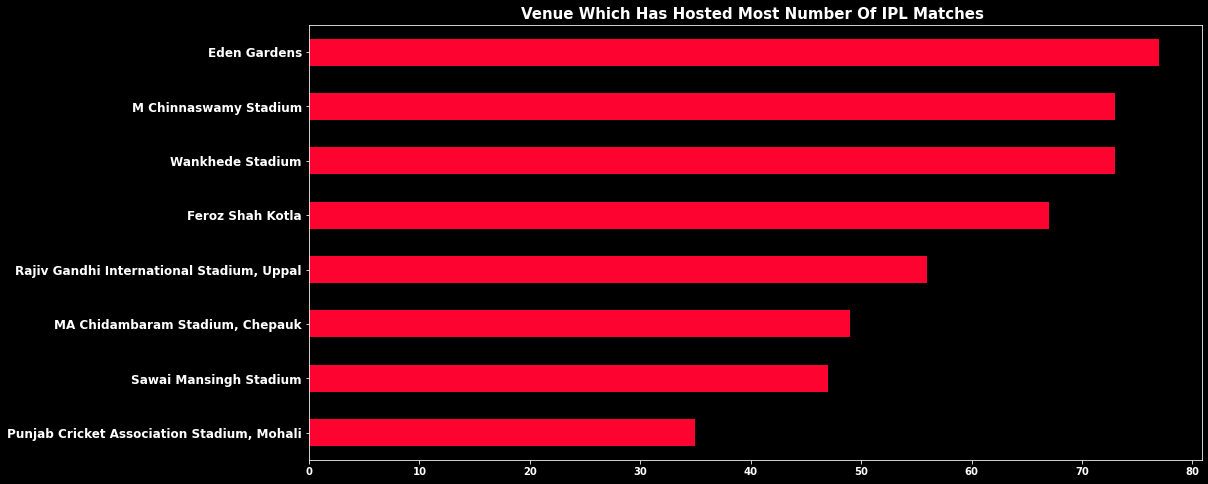

In [39]:
plt.style.use('dark_background')
matches_df['venue'].value_counts().sort_values().tail(8).plot.barh(figsize=(16,8), color = '#fc0330')
plt.title("Venue Which Has Hosted Most Number Of IPL Matches ",fontsize=15,fontweight="bold")
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold',size=12)

Eden Gardens in Kolkata has hosted the highest number of matches so far in IPL followed by M Chinnaswamy Stadium in Bengaluru


Does teams choosed to bat or field first, after winning toss

<AxesSubplot:ylabel='toss_decision'>

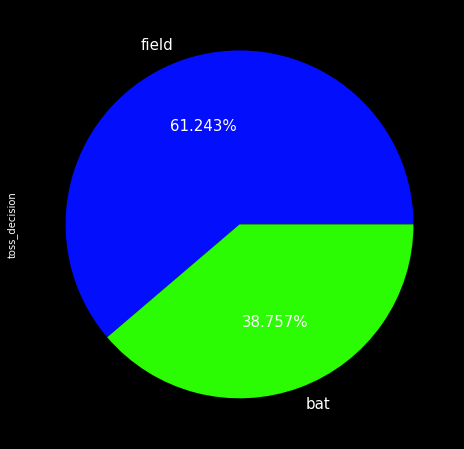

In [40]:
plt.style.use('dark_background')
matches_df['toss_decision'].value_counts().plot.pie(fontsize=15, autopct='%2.3f%%', 
                                               figsize=(16,8),colors=["#030ffc","#2cfc03"])

Which team has maximum wins in IPL so far
creating a dataframe with season and winner columns

In [41]:
winning_teams = matches_df[['season','winner']]

Dictionaries to get winners to each season

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Rajasthan Royals'),
  Text(0, 1, 'Deccan Chargers'),
  Text(0, 2, 'Sunrisers Hyderabad'),
  Text(0, 3, 'Kolkata Knight Riders'),
  Text(0, 4, 'Chennai Super Kings'),
  Text(0, 5, 'Mumbai Indians')])

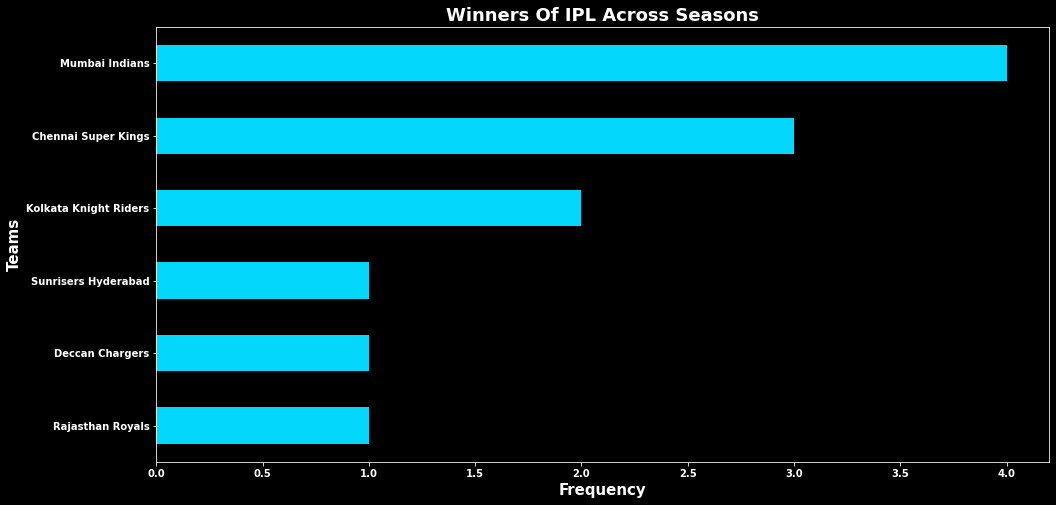

In [42]:
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])
winners_of_IPL['team'].value_counts().sort_values().plot(kind = 'barh', figsize = (16,8), color = '#03d7fc')
plt.title("Winners Of IPL Across Seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 15,fontweight="bold")
plt.xlabel("Frequency", size = 15,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

MI has won 4 times,CSK has won 3 times  followed by KKR who has won 2 times.
Hyderabad team has also won 1 matches under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad

Most toss won by:

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

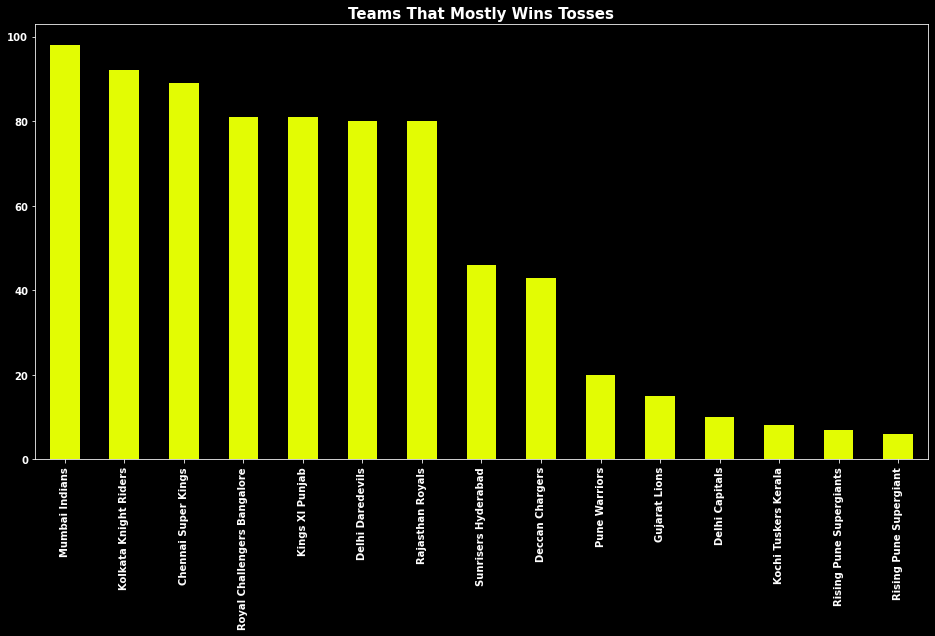

In [43]:
matches_df['toss_winner'].value_counts().plot.bar(figsize=(16,8),color="#e3fc03")
plt.title("Teams That Mostly Wins Tosses",fontsize=15,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

How toss decision affects match results

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([  0.,  50., 100., 150., 200., 250., 300.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

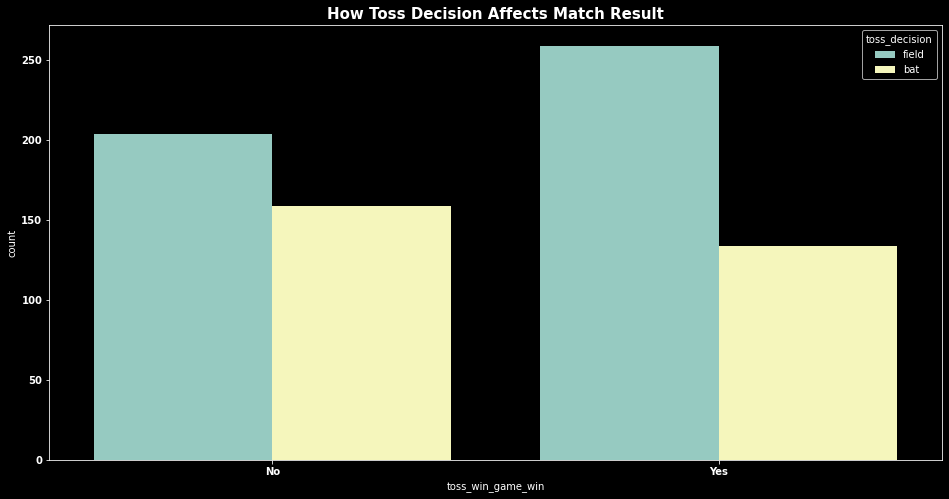

In [44]:
plt.style.use('dark_background')
matches_df['toss_win_game_win'] = np.where((matches_df.toss_winner == matches_df.winner),'Yes','No')
plt.figure(figsize = (16,8))
sns.countplot('toss_win_game_win', data=matches_df, hue = 'toss_decision')
plt.title("How Toss Decision Affects Match Result",fontsize=15,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

Teams winning tosses and choosing to field first have won most number of times

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'Royal Challengers Bangalore'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Sunrisers Hyderabad'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Gujarat Lions'),
  Text(7, 0, 'Delhi Daredevils'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Kochi Tuskers Kerala'),
  Text(12, 0, 'Pune Warriors'),
  Text(13, 0, 'Rising Pune Supergiants'),
  Text(14, 0, 'Delhi Capitals')])

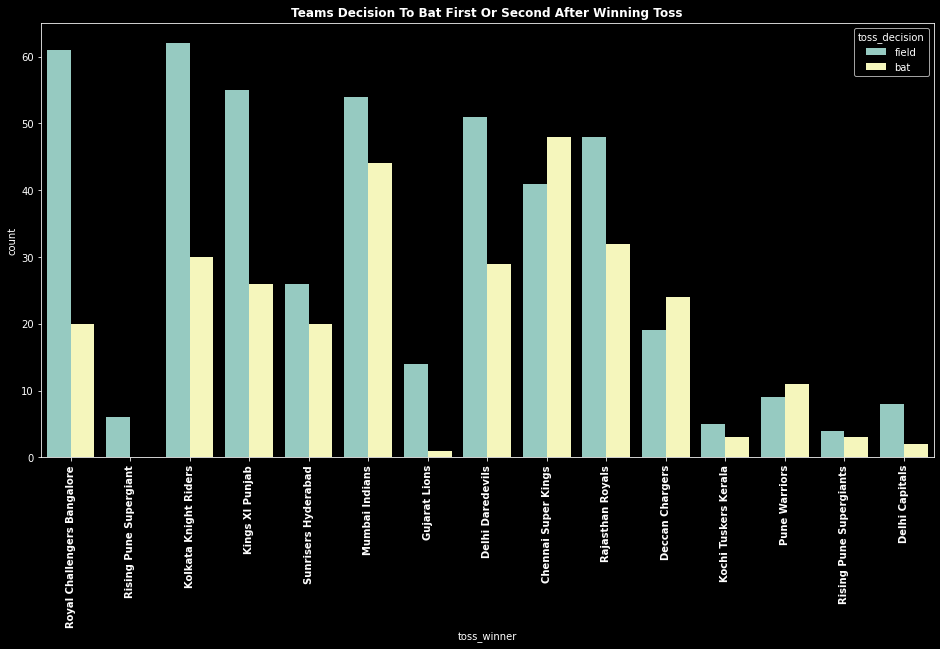

In [45]:
plt.figure(figsize = (16,8))
plt.style.use('dark_background')
sns.countplot('toss_winner', data = matches_df, hue = 'toss_decision')
plt.title("Teams Decision To Bat First Or Second After Winning Toss",fontweight="bold")
plt.xticks(fontweight="bold",rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'CH Gayle'),
  Text(1, 0, 'AB de Villiers'),
  Text(2, 0, 'RG Sharma'),
  Text(3, 0, 'MS Dhoni'),
  Text(4, 0, 'DA Warner'),
  Text(5, 0, 'YK Pathan'),
  Text(6, 0, 'SR Watson'),
  Text(7, 0, 'SK Raina'),
  Text(8, 0, 'G Gambhir'),
  Text(9, 0, 'MEK Hussey')])

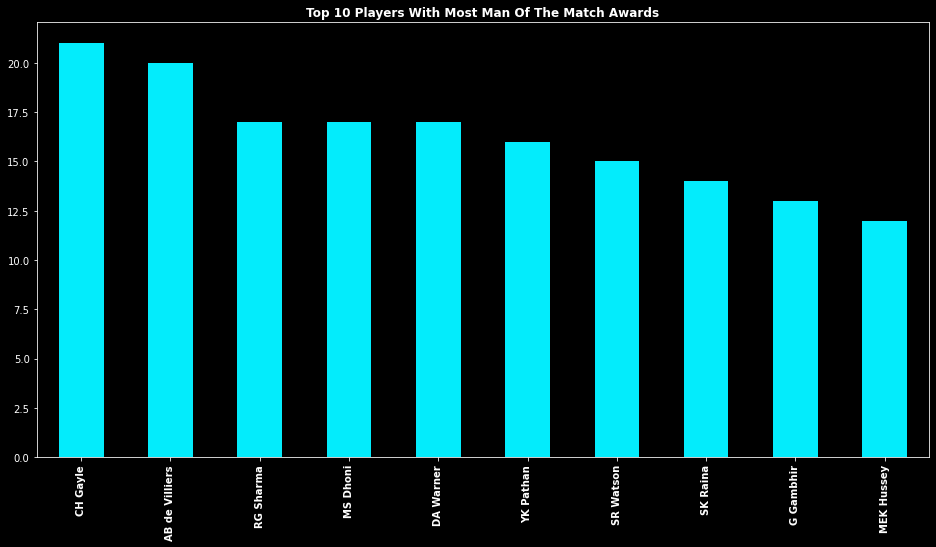

In [46]:
plt.figure(figsize = (16,8))
matches_df["player_of_match"].value_counts().head(10).plot.bar(color="#03ecfc")
plt.title("Top 10 Players With Most Man Of The Match Awards",fontweight="bold")
plt.xticks(fontweight="bold")

Chris Gayle has so far won the most number of MoM awards followed by AB de Villiers.
Also, all top 10 are batsmen which kind of hints that in IPL batsmen have mostly dictated the matches

How winning matches by fielding first varies across venues?

C:\Users\Aman Kumar Singh\AppData\Local\Temp/ipykernel_15392/2849577377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, 'ACA-VDCA Stadium'),
  Text(0, 1, 'Barabati Stadium'),
  Text(0, 2, 'Brabourne Stadium'),
  Text(0, 3, 'Buffalo Park'),
  Text(0, 4, 'De Beers Diamond Oval'),
  Text(0, 5, 'Dr DY Patil Sports Academy'),
  Text(0, 6, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium'),
  Text(0, 7, 'Dubai International Cricket Stadium'),
  Text(0, 8, 'Eden Gardens'),
  Text(0, 9, 'Feroz Shah Kotla'),
  Text(0, 10, 'Feroz Shah Kotla Ground'),
  Text(0, 11, 'Green Park'),
  Text(0, 12, 'Himachal Pradesh Cricket Association Stadium'),
  Text(0, 13, 'Holkar Cricket Stadium'),
  Text(0, 14, 'IS Bindra Stadium'),
  Text(0, 15, 'JSCA International Stadium Complex'),
  Text(0, 16, 'Kingsmead'),
  Text(0, 17, 'M Chinnaswamy Stadium'),
  Text(0, 18, 'M. A. Chidambaram Stadium'),
  Text(0, 19, 'M. Chinnaswamy St

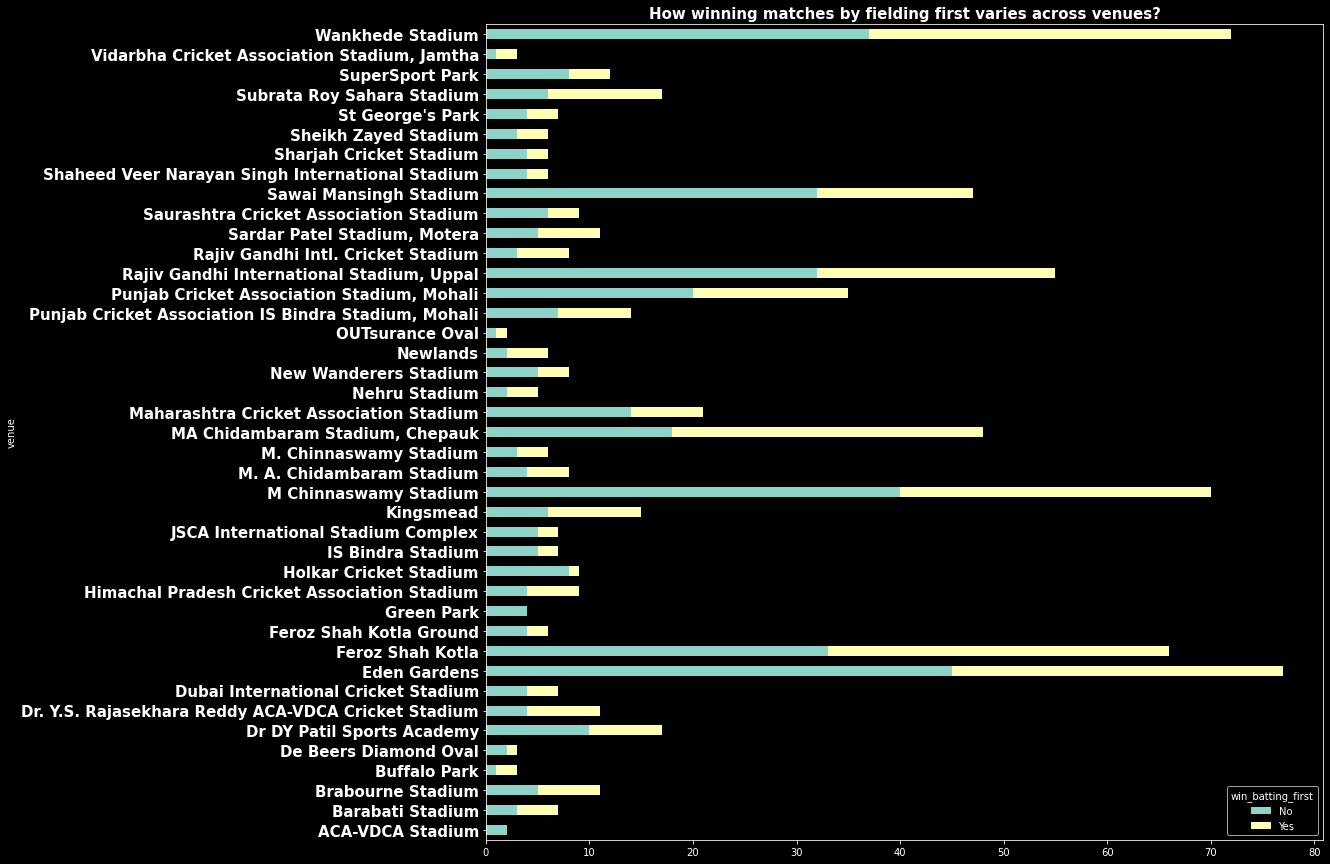

In [47]:
new_matches = matches_df[matches_df['result'] == 'normal']
new_matches['win_batting_first'] = np.where((new_matches.win_by_runs > 0), 'Yes', 'No')
new_matches.groupby('venue')['win_batting_first'].value_counts().unstack().plot.barh( stacked = True,
                                                                               figsize=(15,15))
plt.title("How winning matches by fielding first varies across venues?",fontweight="bold",size=15)
plt.yticks(fontweight="bold",size=15)

Batting second has been more rewarding in almost all the venues

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

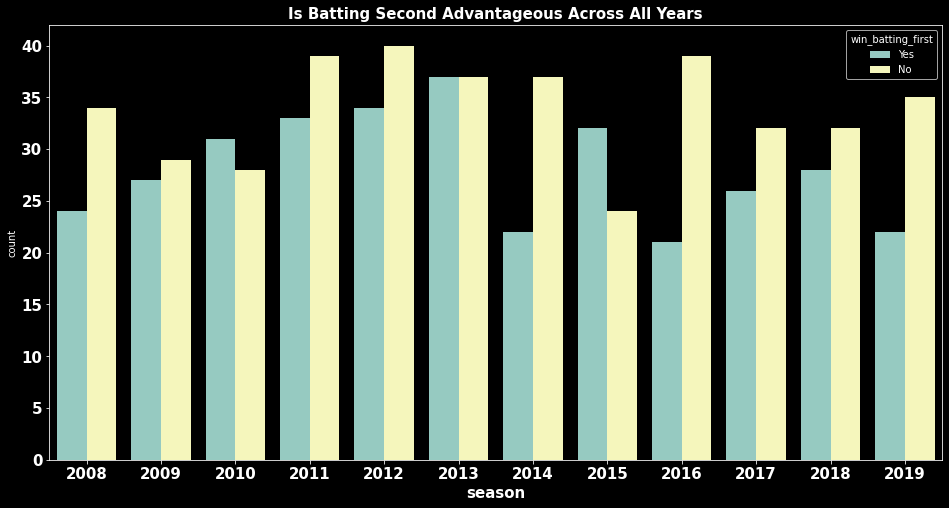

In [48]:
plt.figure(figsize = (16,8))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is Batting Second Advantageous Across All Years",fontweight="bold",size=15)
plt.xticks(fontweight="bold",size=15)
plt.xlabel("season",fontweight="bold",size=15)
plt.yticks(fontweight="bold",size=15)

Except for 2010 and 2015, in all other years it can be seen that teams batting second have won more matches

In [49]:
data = pd.merge(deliveries_df,matches_df, left_on='match_id', right_on ='id')

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

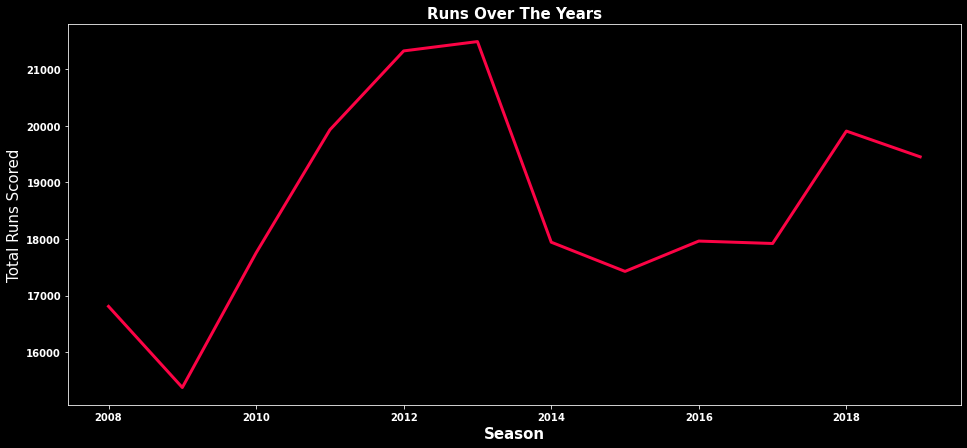

In [50]:
plt.style.use('dark_background')
data.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize=(16,7), color = '#fc0345')
plt.title("Runs Over The Years",fontsize=15,fontweight="bold")
plt.ylabel("Total Runs Scored", size = 15)
plt.xlabel("Season", size = 15,fontweight="bold")
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

Run scoring has gone up from the start of the IPL in 2008

let's plot the top 10 run getter so far in IPL

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

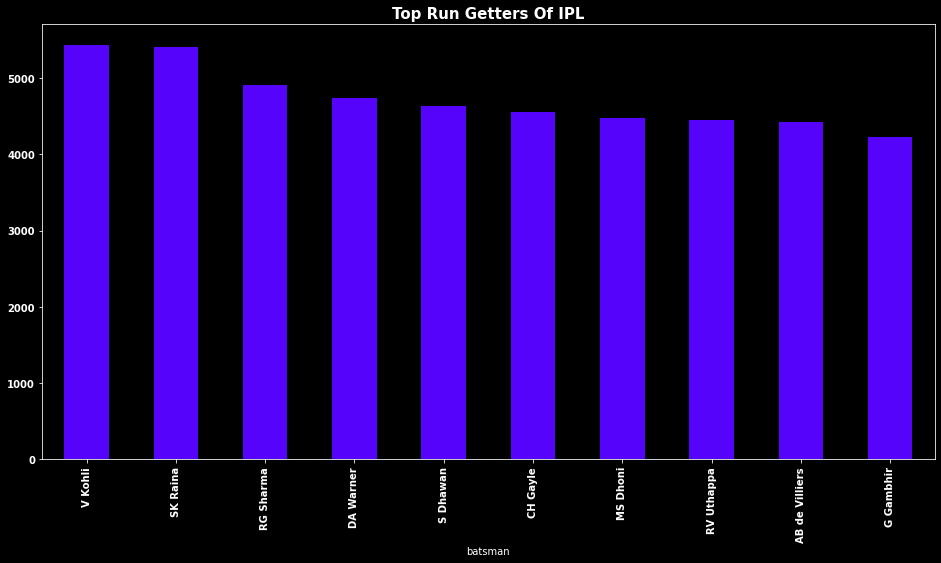

In [51]:
deliveries_df.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot.bar( color = '#5603fc',
                                                                                            figsize = (16,8))
plt.title("Top Run Getters Of IPL",fontweight="bold",size=15)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

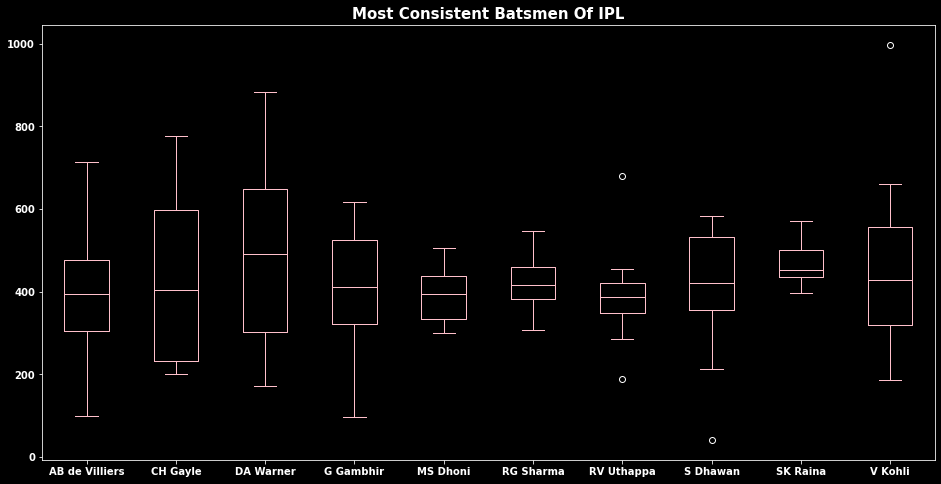

In [52]:
consistent_batsman = data[data.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]
consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (16,8),color="pink")
plt.title("Most Consistent Batsmen Of IPL",fontweight="bold",size=15)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

Median score for Raina is above all the top 10 run getters. He has the highest lowest run among all the batsmen across all seasons. Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

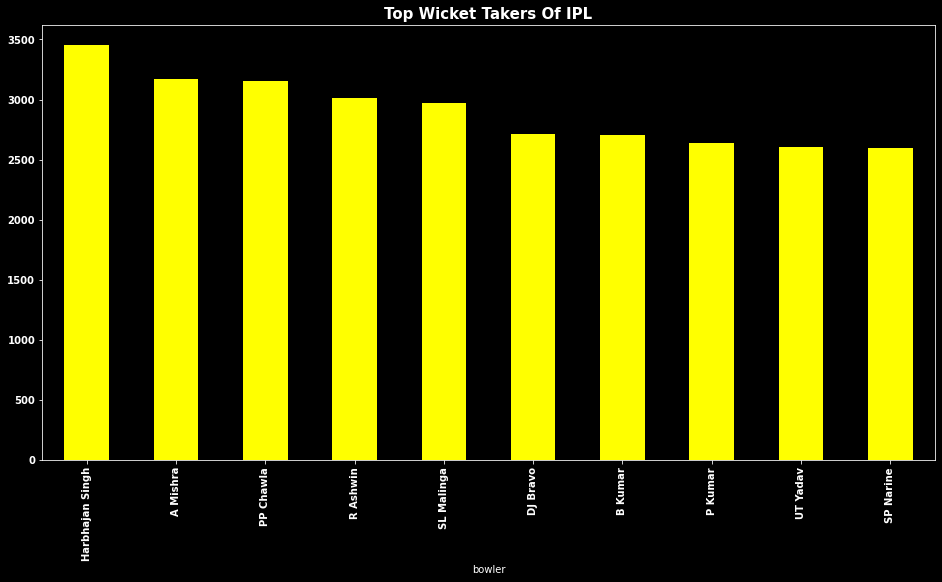

In [53]:
deliveries_df.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot.bar(color = 'yellow', figsize = (16,8))
plt.title("Top Wicket Takers Of IPL",fontweight="bold",size=15)
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

Harbhajan Singh has taken the most number of wickets in IPL followed by Amit Mishra and PP Chawla
In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners
All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners
All 5 pacers are right arm pacers

In [54]:
no_of_balls = pd.DataFrame(data.groupby('batsman')['ball'].count())
runs = pd.DataFrame(data.groupby('batsman')['batsman_runs'].sum()) 
seasons = pd.DataFrame(data.groupby('batsman')['season'].nunique())

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)

highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

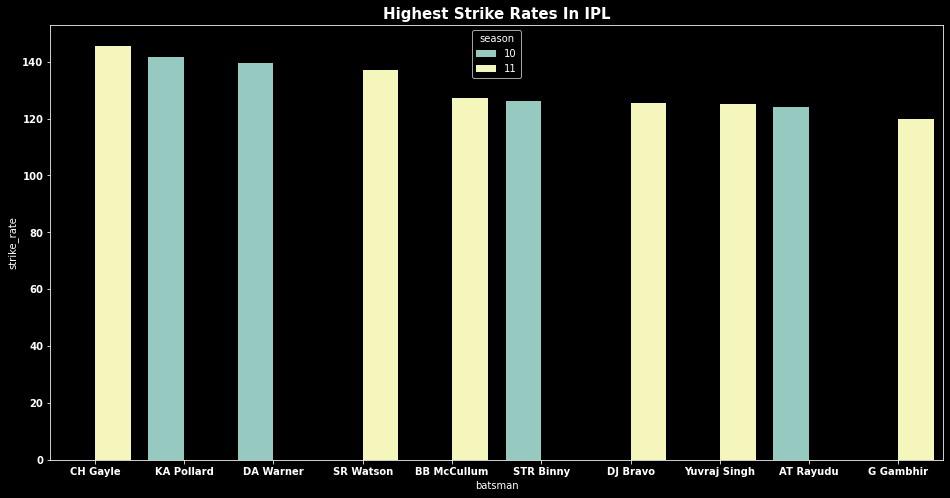

In [55]:
plt.figure(figsize = (16,8))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest Strike Rates In IPL",size=15,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")

CH Gayle has the highest strike rate

(array([  0.,  50., 100., 150., 200., 250.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

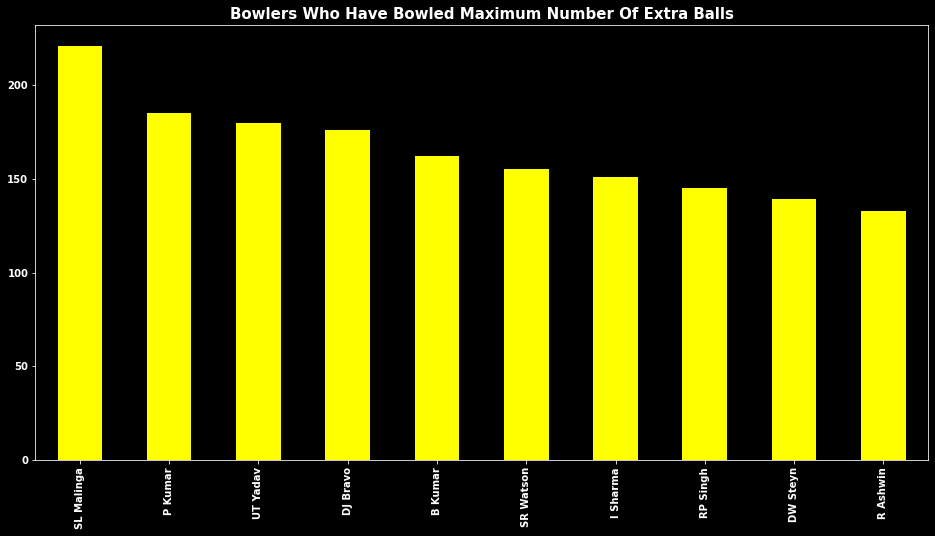

In [56]:
deliveries_df[deliveries_df['extra_runs']!=0]['bowler'].value_counts().head(10).plot.bar(figsize=(16,8),color="yellow")
plt.title('Bowlers Who Have Bowled Maximum Number Of Extra Balls',size=15,fontweight="bold")
plt.xticks(fontweight="bold")
plt.yticks(fontweight="bold")